In [2]:
# Imports
import sys
sys.path.append('../../../utils')

from default_imports import *

# 01_data_preprocessing.ipynb

In [3]:
# Load data
raw_train_df = pd.read_csv('../data/raw/train.csv')
raw_test_df = pd.read_csv('../data/raw/test.csv')

## Data Exploration

### Data dictionary
| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival	                                | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex	   | Sex                                        |                                                |
| Age	   | Age in years                               |                                                |	
| sibsp	   | # of siblings / spouses aboard the Titanic |                                                |
| parch	   | # of parents / children aboard the Titanic	|                                                |
| ticket   | Ticket number                              |                                                |
| fare	   | Passenger fare	                            |                                                |
| cabin	   | Cabin number	                            |                                                |
| embarked | Port of Embarkation	                    | C = Cherbourg, Q = Queenstown, S = Southampton |

In [4]:
display(raw_train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
display(raw_test_df.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


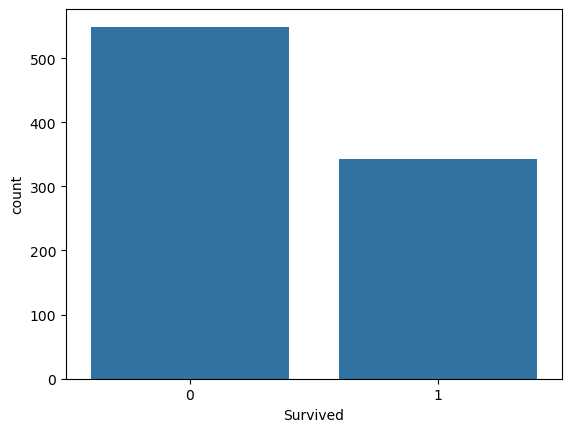

In [6]:
# Class counts
sns.countplot(x='Survived', data=raw_train_df)
plt.show()

In [7]:
raw_train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
raw_test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
raw_test_df[np.isnan(raw_test_df['Fare'])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


## Data Preprocessing

In [10]:
train_df = raw_train_df.drop(columns=['Name', 'Ticket'])
X_test = raw_test_df.drop(columns=['Name', 'Ticket'])

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
y_train = train_df['Survived']
X_train = train_df.drop(columns='Survived').dropna(subset=['Embarked'])

X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,female,38.0,1,0,71.2833,C85,C
2,3,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,female,35.0,1,0,53.1000,C123,S
4,5,3,male,35.0,0,0,8.0500,NaN,S


In [12]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### One-Hot Encoding

In [13]:
# Extract deck level from cabin name
X_train['Cabin'] = X_train['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else x)
X_test['Cabin'] = X_test['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else x)

X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,female,38.0,1,0,71.2833,C,C
2,3,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,female,35.0,1,0,53.1000,C,S
4,5,3,male,35.0,0,0,8.0500,NaN,S


In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = ColumnTransformer(
        transformers=[
            ('sex', OneHotEncoder(), ['Sex']),
            ('embarked', OneHotEncoder(), ['Embarked']),
            ('pclass', OneHotEncoder(), ['Pclass']),
            ('deck', OneHotEncoder(), ['Cabin'])
        ],
        remainder='passthrough'
    )

encoder.fit(X_train)

def one_hot_encode(df: pd.DataFrame) -> pd.DataFrame:
    df_transformed = encoder.transform(df)

    old_columns = df.columns.tolist()
    old_columns.remove('Sex')
    old_columns.remove('Embarked')
    old_columns.remove('Pclass')
    old_columns.remove('Cabin')

    new_columns = list(np.concatenate([
        encoder.transformers_[0][1].get_feature_names_out(['Sex']), 
        encoder.transformers_[1][1].get_feature_names_out(['Embarked']),
        encoder.transformers_[2][1].get_feature_names_out(['Pclass']),
        encoder.transformers_[3][1].get_feature_names_out(['Cabin']),
        ]))

    all_columns = new_columns + old_columns
    return pd.DataFrame(df_transformed, columns=all_columns)

X_train = one_hot_encode(X_train)
X_test = one_hot_encode(X_test)

X_train.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan,PassengerId,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,38.0,1.0,0.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,35.0,1.0,0.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5.0,35.0,0.0,0.0,8.0500


### Fix Age NaNs

In [15]:
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())

display(X_train.head())

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan,PassengerId,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,38.0,1.0,0.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,35.0,1.0,0.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5.0,35.0,0.0,0.0,8.0500


In [16]:
display(X_train.isna().sum())

Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Cabin_A        0
Cabin_B        0
Cabin_C        0
Cabin_D        0
Cabin_E        0
Cabin_F        0
Cabin_G        0
Cabin_T        0
Cabin_nan      0
PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [17]:
display(X_test.isna().sum())

Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Cabin_A        0
Cabin_B        0
Cabin_C        0
Cabin_D        0
Cabin_E        0
Cabin_F        0
Cabin_G        0
Cabin_T        0
Cabin_nan      0
PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           1
dtype: int64

### Fix Fare NaN

In [18]:
X_test.loc[X_test['Fare'].isna(), 'Fare'] = X_test[X_test['Cabin_nan'] == 1]['Fare'].mean()

X_test.isna().sum()

Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Cabin_A        0
Cabin_B        0
Cabin_C        0
Cabin_D        0
Cabin_E        0
Cabin_F        0
Cabin_G        0
Cabin_T        0
Cabin_nan      0
PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

### Normalization

In [19]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_train.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan,PassengerId,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,-0.589620,0.431350,-0.474326,-0.500240
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.644848,0.431350,-0.474326,0.788947
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,-0.281003,-0.475199,-0.474326,-0.486650
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.413385,0.431350,-0.474326,0.422861
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5.0,0.413385,-0.475199,-0.474326,-0.484133


### Storing

In [22]:
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)